## Matrix multiplication from foundations

The *foundations* we'll assume throughout this course are:

- Python
- matplotlib
- The Python standard library
- Jupyter notebooks and nbdev

In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

## Get data

In [2]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

[urlretrieve](https://docs.python.org/3/library/urllib.request.html#urllib.request.urlretrieve) - (read the docs!)

In [3]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [4]:
!ls -l data

total 33312
-rw-r--r--  1 nitinrawat  staff  17051982 Nov 15 09:55 mnist.pkl.gz


In [5]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [6]:
print('train:', x_train.shape,y_train.shape)
print('valid:', x_valid.shape,y_valid.shape)

train: (50000, 784) (50000,)
valid: (10000, 784) (10000,)


each MNIST sample has 784 features, each feature representing a pixel in a 18x18 image. There are 50k samples in train and 10k in validation.

In [7]:
print(x_train.min(),x_train.max(),x_train.mean(),x_train.std())
print(x_valid.min(),x_valid.max(),x_train.mean(),x_train.std())

0.0 0.99609375 0.13044983 0.3072898


0.0 0.99609375 0.13044983 0.3072898


The values range from 0 to 1. Mean is around 0.13 and standard deviation is around 0.3

In [8]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

## Writing generators

In [9]:
def chunks(x, sz): # given an x return values of size sz at a time
    for i in range(0, len(x), sz): yield x[i:i+sz]

In [10]:
# if we feed vals, an array of size 10, and ask for size 5, we get values of 5 everytime.
# So we get list of 5 twice, and then no more as we have iterated through all the data
# list helps us get all the outputs in the generator in one go
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

In [11]:
# create an iterator out of the generator
val_iter = chunks(vals,5)

In [12]:
# and we can get the values out of the iterator 1 at a time by using next
next(val_iter)

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

## Plotting the image using generators

To plot the image, we need to convert the pixel data that is a list (originally 1 D array), into a list of lists (akin to a 2D array). So we can use a generator that takes spits out list of 28 pixels at a time and stitch them into a list. And voila, use that to plot the image 

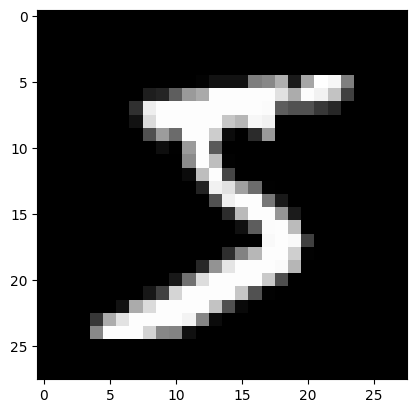

In [13]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst1, 28)));

You can change the image size as well as the color palatte

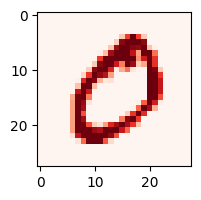

In [14]:
mpl.rcParams['image.cmap'] = 'Reds'
plt.figure(figsize = (2,2))
plt.imshow(list(chunks(list(x_train[1]), 28)));

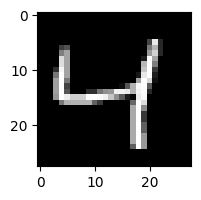

In [15]:
mpl.rcParams['image.cmap'] = 'gray'
plt.figure(figsize = (2,2))
plt.imshow(list(chunks(list(x_train[2]), 28)));

## Creating iterator using itertools and islice

[islice](https://docs.python.org/3/library/itertools.html#itertools.islice)

In [16]:
from itertools import islice

Instead of writing a generator function, we can use python built in functions and itertools

In [17]:
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [18]:
it = iter(vals)

using `iter` changes a list to an iterable, spitting out 1 element of that list at a time

In [19]:
print(next(it),next(it),next(it),next(it),next(it))

0.0 0.0 0.0 0.19140625 0.9296875


Using islice we can let the iterator run for 5 times

In [20]:
it = iter(vals)
its = islice(it, 5)

In [21]:
list(its)

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [22]:
list(its)

[]

In [23]:
len(lst1)

784

In [24]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

`list(islice(it, 28))` creates a list of 28 elements, where the islice invokes the iterator `it` to generate 28 elements at a time.

We put this in a callable, that becomes part of another iterator, that then invoked this cycle of generating 28 elements at a time, till it returns the sentinel i.e, the [] i.e, the `it` is completely exhausted

So all in all a nifty trick ot chunking a single list into chunks of 28 at a time and create a list ot lists that can be used to render the image

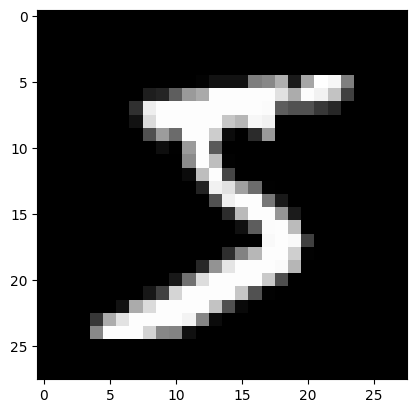

In [25]:
plt.imshow(img);

## Matrix and tensor

In [26]:
img[20][15]

0.98828125

In [27]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

The part of the class that start and end with double underscores, are called dunder methods. Above we see dunder init and dunder getitem. These are special inbuilt methods in python that are predefined in python.

In [28]:
m = Matrix(img)
m[20,15]

0.98828125

Just like we can define our own class Matrix, Pytorch has Tensor classes that can wrap up the data and do many more things

In [29]:
import torch
from torch import tensor

In [57]:
tensor([1,2,3])

tensor([1, 2, 3])

In [30]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
x_train.shape

torch.Size([50000, 784])

In [31]:
x_train.type()

'torch.FloatTensor'

[Tensor](https://pytorch.org/docs/stable/tensors.html)

In [32]:
imgs = x_train.reshape((-1,28,28))
imgs.shape

torch.Size([50000, 28, 28])

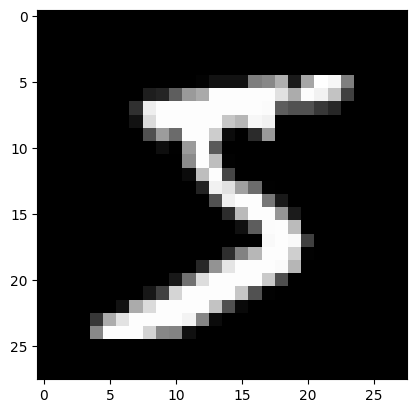

In [33]:
plt.imshow(imgs[0]);

In [34]:
imgs[0,20,15]

tensor(0.9883)

In [35]:
n,c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [36]:
min(y_train),max(y_train)

(tensor(0), tensor(9))

In [37]:
y_train.min(), y_train.max()

(tensor(0), tensor(9))

## Random numbers

Based on the Wichmann Hill algorithm used before Python 2.3.

In [66]:
rnd_state = None
def seed(a):
    global rnd_state
    # The divmod() function returns a tuple containing the quotient and the remainder when argument1 (dividend) is divided by argument2 (divisor).
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [67]:
seed(2)
rnd_state

(3, 1, 1)

In [68]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [69]:
rand(),rand(),rand()

(0.028229594626760467, 0.827329632272721, 0.49643931815391285)

In [ ]:
if os.fork(): print(f'In parent: {rand()}')
else:
    print(f'In child: {rand()}')
    os._exit(os.EX_OK)

In parent: 0.7656855727169847
In child: 0.7656855727169847

In [ ]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
    print(f'In child: {torch.rand(1)}')
    os._exit(os.EX_OK)

In parent: tensor([0.2535])
In child: tensor([0.2535])

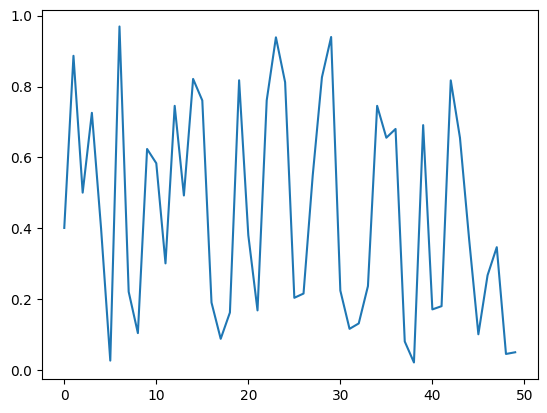

In [72]:
plt.plot([rand() for _ in range(50)]);

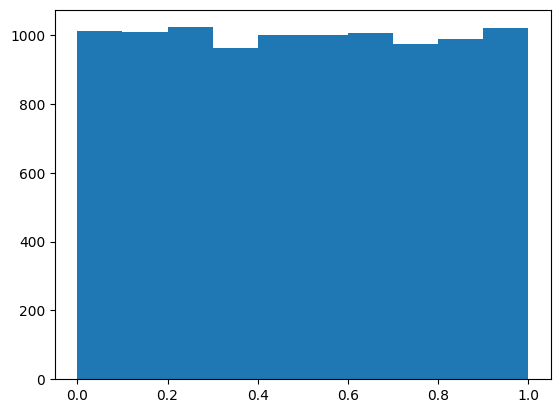

In [73]:
plt.hist([rand() for _ in range(10000)]);

In [74]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

3.5 ms ± 315 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [75]:
%timeit -n 10 torch.randn(784,10)

84.7 µs ± 33.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Torch has a faster reproducible implementation of random number generator

## Matrix multiplication

In [76]:
torch.manual_seed(1)
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [78]:
m1 = x_valid[:5] # first 5 samples of x_valid
m2 = weights

In [79]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [80]:
ar,ac = m1.shape # n_rows * n_cols
br,bc = m2.shape
(ar,ac),(br,bc)

((5, 784), (784, 10))

Multiplication of the 2 matrices will be of shape (5,10)

In [81]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

We can do the matrix multiplication by looping through the elements in the 2 matrices, multiplying the right elements and summing them up

In [82]:
for i in range(ar):         # 5
    for j in range(bc):     # 10
        for k in range(ac): # 784
            t1[i,j] += m1[i,k] * m2[k,j]

In [83]:
t1

tensor([[-10.9417,  -0.6844,  -7.0038,  -4.0066,  -2.0857,  -3.3588,   3.9127,
          -3.4375, -11.4696,  -2.1153],
        [ 14.5430,   5.9977,   2.8914,  -4.0777,   6.5914, -14.7383,  -9.2787,
           2.1577, -15.2772,  -2.6758],
        [  2.2204,  -3.2171,  -4.7988,  -6.0453,  14.1661,  -8.9824,  -4.7922,
          -5.4446, -20.6758,  13.5657],
        [ -6.7097,   8.8998,  -7.4611,  -7.8966,   2.6994,  -4.7260, -11.0278,
         -12.9776,  -6.4443,   3.6376],
        [ -2.4444,  -6.4034,  -2.3984,  -9.0371,  11.1772,  -5.7724,  -8.9214,
          -3.7862,  -8.9827,   5.2797]])

In [84]:
t1.shape

torch.Size([5, 10])

In [85]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [86]:
import numpy as np
np.set_printoptions(precision=2, linewidth=140)

In [87]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): c[i,j] += a[i,k] * b[k,j]
    return c

In [88]:
%time _=matmul(m1, m2)

CPU times: user 654 ms, sys: 9.16 ms, total: 663 ms
Wall time: 674 ms


In [89]:
ar*bc*ac

39200

We are going through 39200 loops. And 674 ms is terribly slow

## Numba

Numba is a system that turns python function into machine code. njit helps do that. In short things will run more quickly

In [99]:
from numba import njit

In [100]:
@njit
def dot(a,b):
    res = 0.
    for i in range(len(a)): res+=a[i]*b[i]
    return res

In [101]:
from numpy import array

In [102]:
%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: user 92.6 ms, sys: 3.91 ms, total: 96.5 ms
Wall time: 98.3 ms


20.0

This is not terribly fast. The reason is that the first time you run it, it also compiles the code into machine code. So let's run it one more time

In [104]:
%time dot(array([1.,2,3]),array([2.,3,4]))

CPU times: user 34 µs, sys: 5 µs, total: 39 µs
Wall time: 49.1 µs


20.0

Now it is super way fast.

Now only two of our loops are running in Python, not three:

In [105]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = dot(a[i,:], b[:,j])
    return c

In [106]:
m1a,m2a = m1.numpy(),m2.numpy()

In [107]:
from fastcore.test import *

In [108]:
test_close(t1,matmul(m1a, m2a))

In [109]:
%timeit -n 50 matmul(m1a,m2a)

395 µs ± 37.8 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Elementwise ops

[TryAPL](https://tryapl.org/)

In [110]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [111]:
a + b

tensor([12., 14.,  3.])

In [112]:
(a < b).float().mean()

tensor(0.67)

In [113]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Frobenius norm:

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

*Hint*: you don't normally need to write equations in LaTeX yourself, instead, you can click 'edit' in Wikipedia and copy the LaTeX from there (which is what I did for the above equation). Or on arxiv.org, click "Download: Other formats" in the top right, then "Download source"; rename the downloaded file to end in `.tgz` if it doesn't already, and you should find the source there, including the equations to copy and paste. This is the source LaTeX that I pasted to render the equation above:

```latex
$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$
```

In [114]:
sf = (m*m).sum()
sf

tensor(285.)

In [115]:
sf.sqrt()

tensor(16.88)

In [116]:
m[2,:],m[:,2]

(tensor([7., 8., 9.]), tensor([3., 6., 9.]))

In [117]:
m[2]

tensor([7., 8., 9.])

In [118]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [119]:
test_close(t1,matmul(m1, m2))

In [120]:
%timeit -n 50 _=matmul(m1, m2)

921 µs ± 103 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [121]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = torch.dot(a[i,:], b[:,j])
    return c

In [122]:
test_close(t1,matmul(m1, m2))

In [123]:
%timeit -n 50 _=matmul(m1, m2)

765 µs ± 71.5 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Broadcasting

The term **broadcasting** describes how arrays with different shapes are treated during arithmetic operations.

From the [Numpy Documentation](https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html):

    The term broadcasting describes how numpy treats arrays with 
    different shapes during arithmetic operations. Subject to certain 
    constraints, the smaller array is “broadcast” across the larger 
    array so that they have compatible shapes. Broadcasting provides a 
    means of vectorizing array operations so that looping occurs in C
    instead of Python. It does this without making needless copies of 
    data and usually leads to efficient algorithm implementations.
    
In addition to the efficiency of broadcasting, it allows developers to write less code, which typically leads to fewer errors.

*This section was adapted from [Chapter 4](http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/4.%20Compressed%20Sensing%20of%20CT%20Scans%20with%20Robust%20Regression.ipynb#4.-Compressed-Sensing-of-CT-Scans-with-Robust-Regression) of the fast.ai [Computational Linear Algebra](https://github.com/fastai/numerical-linear-algebra) course.*

### Broadcasting with a scalar

In [124]:
a

tensor([10.,  6., -4.])

In [125]:
a > 0

tensor([ True,  True, False])

How are we able to do `a > 0`?  0 is being **broadcast** to have the same dimensions as a.

For instance you can normalize our dataset by subtracting the mean (a scalar) from the entire data set (a matrix) and dividing by the standard deviation (another scalar), using broadcasting.

Other examples of broadcasting with a scalar:

In [126]:
a + 1

tensor([11.,  7., -3.])

In [127]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [128]:
2*m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

### Broadcasting a vector to a matrix

Although broadcasting a scalar is an idea that dates back to APL, the more powerful idea of broadcasting across higher rank tensors [comes from](https://mail.python.org/pipermail/matrix-sig/1995-November/000143.html) a little known language called [Yorick](https://software.llnl.gov/yorick-doc/manual/yorick_50.html).

We can also broadcast a vector to a matrix:

In [129]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [130]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [131]:
m.shape,c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [132]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [133]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [134]:
t = c.expand_as(m)

In [135]:
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [136]:
m + t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

We don't really copy the rows, but it looks as if we did. In fact, the rows are given a *stride* of 0.

In [137]:
t.storage()

/var/folders/t5/kr_2m2cj465c565x6p6yycb00000gn/T/ipykernel_10544/1911556638.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  t.storage()


 10.0
 20.0
 30.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 3]

In [138]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

You can index with the special value [None] or use `unsqueeze()` to convert a 1-dimensional array into a 2-dimensional array (although one of those dimensions has value 1).

In [139]:
c.unsqueeze(0), c[None, :]

(tensor([[10., 20., 30.]]), tensor([[10., 20., 30.]]))

In [140]:
c.shape, c.unsqueeze(0).shape

(torch.Size([3]), torch.Size([1, 3]))

In [141]:
c.unsqueeze(1), c[:, None]

(tensor([[10.],
         [20.],
         [30.]]),
 tensor([[10.],
         [20.],
         [30.]]))

In [142]:
c.shape, c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([3, 1]))

You can always skip trailling ':'s. And '...' means '*all preceding dimensions*'

In [143]:
c[None].shape,c[...,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [144]:
c[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [145]:
m + c[:,None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [146]:
m + c[None,:]

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

### Broadcasting Rules

In [155]:
c

tensor([10., 20., 30.])

In [148]:
c[None,:]

tensor([[10., 20., 30.]])

In [149]:
c[None,:].shape

torch.Size([1, 3])

In [150]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

In [151]:
c[:,None].shape

torch.Size([3, 1])

In [152]:
c[None,:] * c[:,None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [153]:
c[None] > c[:,None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

None adds dimensions to the array

In [154]:
m*m

tensor([[ 1.,  4.,  9.],
        [16., 25., 36.],
        [49., 64., 81.]])

When operating on two arrays/tensors, Numpy/PyTorch compares their shapes element-wise. It starts with the **trailing dimensions**, (the left most dimensions) and works its way forward. Two dimensions are **compatible** when

- they are equal, or
- one of them is 1, in which case that dimension is broadcasted to make it the same size

Arrays do not need to have the same number of dimensions. For example, if you have a `256*256*3` array of RGB values, and you want to scale each color in the image by a different value, you can multiply the image by a one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according to the broadcast rules, shows that they are compatible:

    Image  (3d array): 256 x 256 x 3
    Scale  (1d array):             3
    Result (3d array): 256 x 256 x 3

Broadcasting adds the makes the Scale array also 256 x 256 x 3 internally before doing element wise multiplication

The [numpy documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html#general-broadcasting-rules) includes several examples of what dimensions can and can not be broadcast together.

## Matmul with broadcasting

In [156]:
digit = m1[0]
digit.shape,m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [157]:
digit[:,None].shape

torch.Size([784, 1])

In [158]:
digit[:,None].expand_as(m2).shape

torch.Size([784, 10])

In [159]:
(digit[:,None]*m2).shape

torch.Size([784, 10])

In [160]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
#       c[i,j] = (a[i,:] * b[:,j]).sum()      # previous version
        c[i]   = (a[i,:,None] * b).sum(dim=0) # broadcast version
    return c

In [161]:
test_close(t1,matmul(m1, m2))

In [162]:
%timeit -n 50 _=matmul(m1, m2)

117 µs ± 30.2 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


Our time has gone from ~500ms to <0.1ms, an over 5000x improvement! We can run on the whole dataset now.

In [163]:
tr = matmul(x_train, weights)
tr

tensor([[  0.96,  -2.96,  -2.11,  ..., -15.09, -17.69,   0.60],
        [  6.89,  -0.34,   0.79,  ..., -17.13, -25.36,  16.23],
        [-10.18,   7.38,   4.13,  ...,  -6.73,  -6.79,  -1.58],
        ...,
        [  7.40,   7.64,  -3.50,  ...,  -1.02, -16.22,   2.07],
        [  3.25,   9.52,  -9.37,  ...,   2.98, -19.58,  -1.96],
        [ 15.70,   4.12,  -5.62,  ...,   8.08, -12.21,   0.42]])

In [164]:
tr.shape

torch.Size([50000, 10])

In [165]:
%time _=matmul(x_train, weights)

CPU times: user 1.25 s, sys: 25.6 ms, total: 1.27 s
Wall time: 914 ms


## Einstein summation

[Einstein summation](https://ajcr.net/Basic-guide-to-einsum/) ([`einsum`](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html)) is a compact representation for combining products and sums in a general way. The key rules are:

- Repeating letters between input arrays means that values along those axes will be multiplied together.
- Omitting a letter from the output means that values along that axis will be summed.

In [166]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [167]:
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] = (a[i,:] * b[:,j]).sum()
mr = torch.einsum('ik,kj->ikj', m1, m2)
mr.shape

torch.Size([5, 784, 10])

In [168]:
mr.sum(1)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [169]:
torch.einsum('ik,kj->ij', m1, m2)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [170]:
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [171]:
test_close(tr, matmul(x_train, weights), eps=1e-3)

In [172]:
%timeit -n 5 _=matmul(x_train, weights)

8.85 ms ± 567 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


## pytorch op

We can use pytorch's function or operator directly for matrix multiplication.

In [173]:
test_close(tr, x_train@weights, eps=1e-3)

In [174]:
%timeit -n 5 _=torch.matmul(x_train, weights)

8.73 ms ± 734 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


## CUDA

Note: CUDA was not available on Macbook to run any experiments

In [175]:
def matmul(grid, a,b,c):
    i,j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

In [176]:
res = torch.zeros(ar, bc)
matmul((0,0), m1, m2, res)
res

tensor([[-10.94,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00]])

In [177]:
def launch_kernel(kernel, grid_x, grid_y, *args, **kwargs):
    for i in range(grid_x):
        for j in range(grid_y): kernel((i,j), *args, **kwargs)

In [178]:
res = torch.zeros(ar, bc)
launch_kernel(matmul, ar, bc, m1, m2, res)
res

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [179]:
from numba import cuda

In [180]:
def matmul(grid, a,b,c):
    i,j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

In [181]:
@cuda.jit
def matmul(a,b,c):
    i, j = cuda.grid(2)
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

In [182]:
r = np.zeros(tr.shape)
m1g,m2g,rg = map(cuda.to_device, (x_train,weights,r))

CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:

In [183]:
r.shape

(50000, 10)

In [184]:
TPB = 16
rr,rc = r.shape
blockspergrid = (math.ceil(rr / TPB), math.ceil(rc / TPB))
blockspergrid

(3125, 1)

In [185]:
matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg)
r = rg.copy_to_host()
test_close(tr, r, eps=1e-3)

NameError: name 'm1g' is not defined

In [ ]:
%%timeit -n 10
matmul[blockspergrid, (TPB,TPB)](m1g,m2g,rg)
r = rg.copy_to_host()

3.61 ms ± 708 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
m1c,m2c = x_train.cuda(),weights.cuda()

In [ ]:
r=(m1c@m2c).cpu()

In [ ]:
%timeit -n 10 r=(m1c@m2c).cpu()

458 µs ± 93.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Our broadcasting version was >500ms, and our CUDA version is around 0.5ms, which is another 1000x improvement compared to broadcasting. So our total speedup is around 5 million times!